# Sentiment Analysis of Wine Data
* Can we use Machine Learning to predict the quality of wine based on it's description length?
* Dataset: https://www.kaggle.com/zynicide/wine-reviews

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Clean Data
* Read CSV for starting data
* drop nulls and duplicates from description and points columns
* drop columns down to description and points

In [2]:
# Read CSV
data = pd.read_csv("winemag-data_first150k.csv")
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
# drop nulls and duplicates from description and points columns
clean_data = data[data.duplicated('description', keep=False)]
clean_data.dropna(subset=['description', 'points'])

# Print new length of data
print(len(clean_data))


92393


In [4]:
clean_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
25,25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
29,29,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah
60,60,Argentina,"Concentrated, ripe blackberry and cassis aroma...",The Apple Doesn't Fall Far From The Tree,91,30.0,Mendoza Province,Mendoza,NaN,Malbec,Matias Riccitelli
61,61,Australia,Moorooduc's estate Pinot Noir is a solid value...,NaN,91,36.0,Victoria,Mornington Peninsula,NaN,Pinot Noir,Moorooduc
62,62,Argentina,Smoky aromas of fresh-cut wood blend with berr...,Alegoría Gran Reserva,91,25.0,Mendoza Province,Mendoza,NaN,Malbec,Navarro Correas


In [5]:
#drop columns down to description and points
description_points_df = clean_data[['description','points']]
description_points_df.head()

,description,points
25,"Yields were down in 2015, but intensity is up,...",94
29,This standout Rocks District wine brings earth...,94
60,"Concentrated, ripe blackberry and cassis aroma...",91
61,Moorooduc's estate Pinot Noir is a solid value...,91
62,Smoky aromas of fresh-cut wood blend with berr...,91


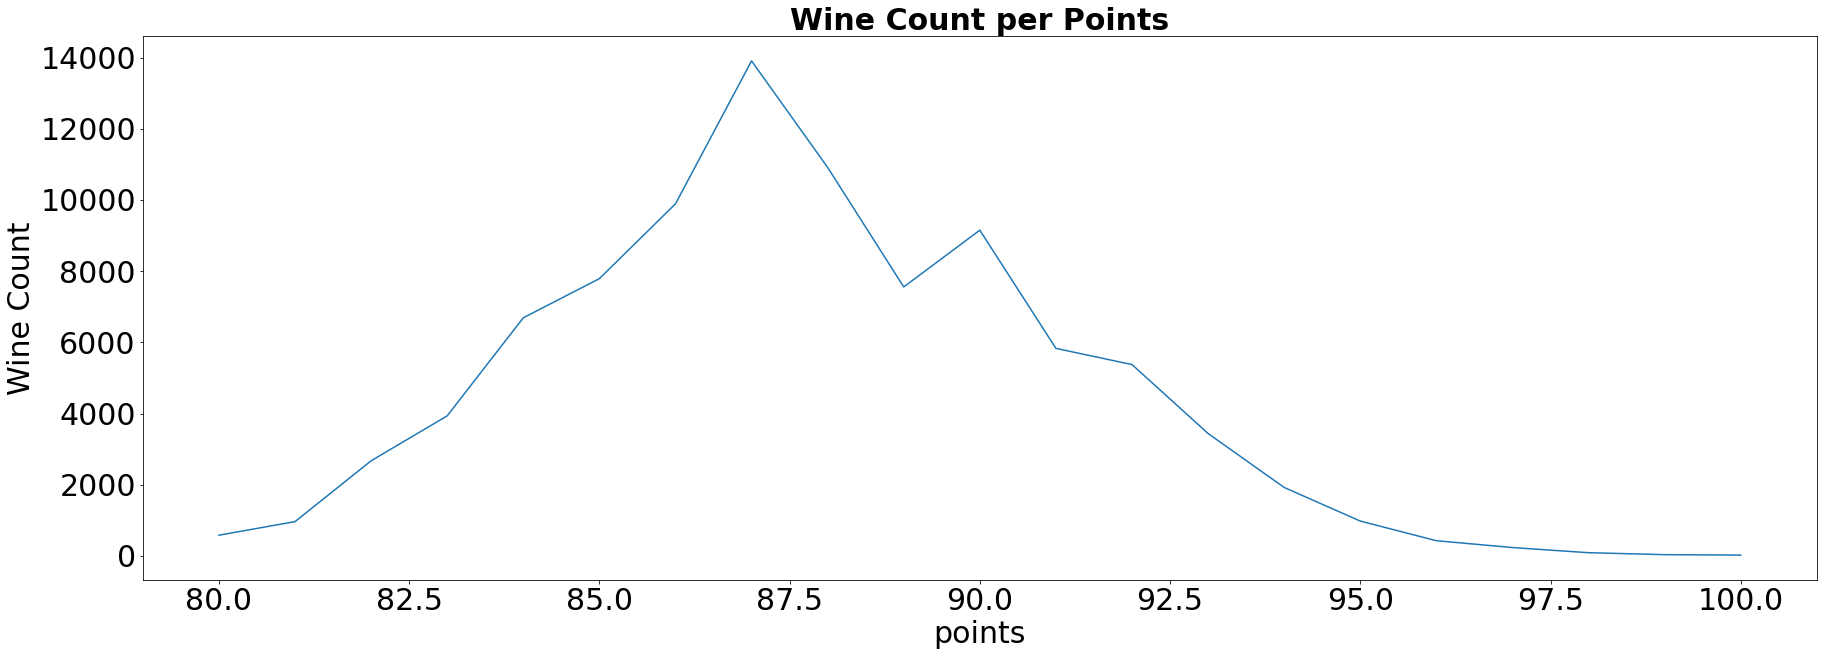

In [6]:
# plot the wine count per points
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=30) 
plt.xticks(rotation=45)
plt.yticks(fontsize=30) 
ax.set_title('Wine Count per Points', fontweight="bold", size=30)
ax.set_ylabel('Wine Count', fontsize = 30)
ax.set_xlabel('Points', fontsize = 30) 
description_points_df.groupby(['points']).count()['description'].plot(ax=ax)#kind=bar for a bar chart
plt.show()

# Description length vs points
* Add description length column

In [7]:
# Add description length column
description_points_df = description_points_df.assign(description_length = description_points_df['description'].apply(len))
description_points_df.head()

,description,points,description_length
25,"Yields were down in 2015, but intensity is up,...",94,215
29,This standout Rocks District wine brings earth...,94,333
60,"Concentrated, ripe blackberry and cassis aroma...",91,242
61,Moorooduc's estate Pinot Noir is a solid value...,91,315
62,Smoky aromas of fresh-cut wood blend with berr...,91,229


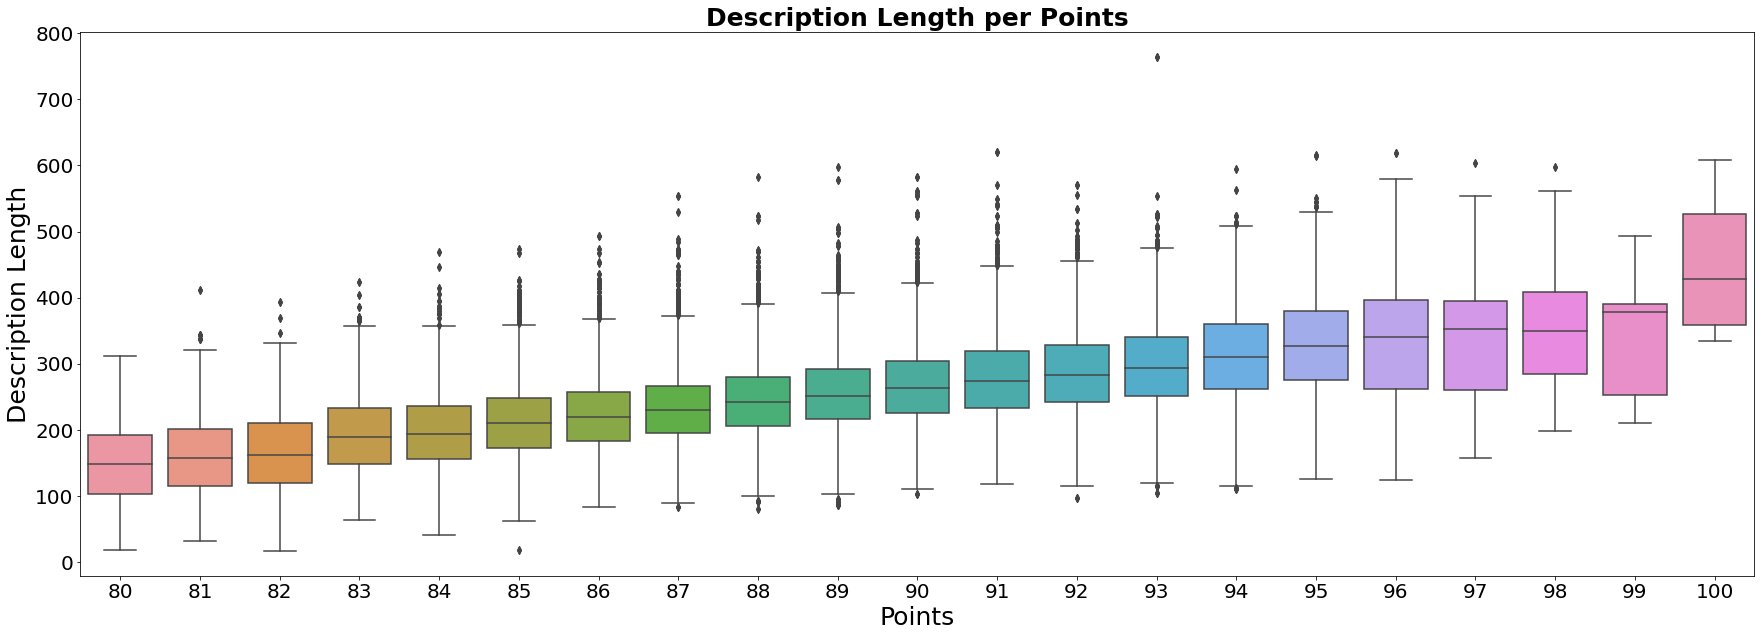

In [8]:
# plot correlation of description length to points
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='description_length', data=description_points_df)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Description Length per Points', fontweight="bold", size=25) 
ax.set_ylabel('Description Length', fontsize = 25) 
ax.set_xlabel('Points', fontsize = 25) 
plt.show()

# K.I.S.S - simplify the points distribution
* Keep it simple stupid
* 1 -> Points 80 to 84 (Mediocre)
* 2 -> Points 84 to 88 (Good)
* 3 -> Points 88 to 92 (Very good)
* 4 -> Points 92 to 96 (Outstanding)
* 5 -> Points 96 to 100 (Classic)

In [9]:
# simplify the points data
def getQuality(points):
  if points < 84:
    return '1.Mediocre'
  elif points >= 84 and points < 88:
    return '2.Good'
  elif points >= 88 and points < 92:
    return '3.Very good'
  elif points >= 92 and points < 96:
    return '4.Outstanding'
  else:
    return '5.Classic'

# Add kiss_points column
description_points_df = description_points_df.assign(kiss_points = description_points_df['points'].apply(getQuality))
description_points_df.head()
    

,description,points,description_length,kiss_points
25,"Yields were down in 2015, but intensity is up,...",94,215,4.Outstanding
29,This standout Rocks District wine brings earth...,94,333,4.Outstanding
60,"Concentrated, ripe blackberry and cassis aroma...",91,242,3.Very good
61,Moorooduc's estate Pinot Noir is a solid value...,91,315,3.Very good
62,Smoky aromas of fresh-cut wood blend with berr...,91,229,3.Very good


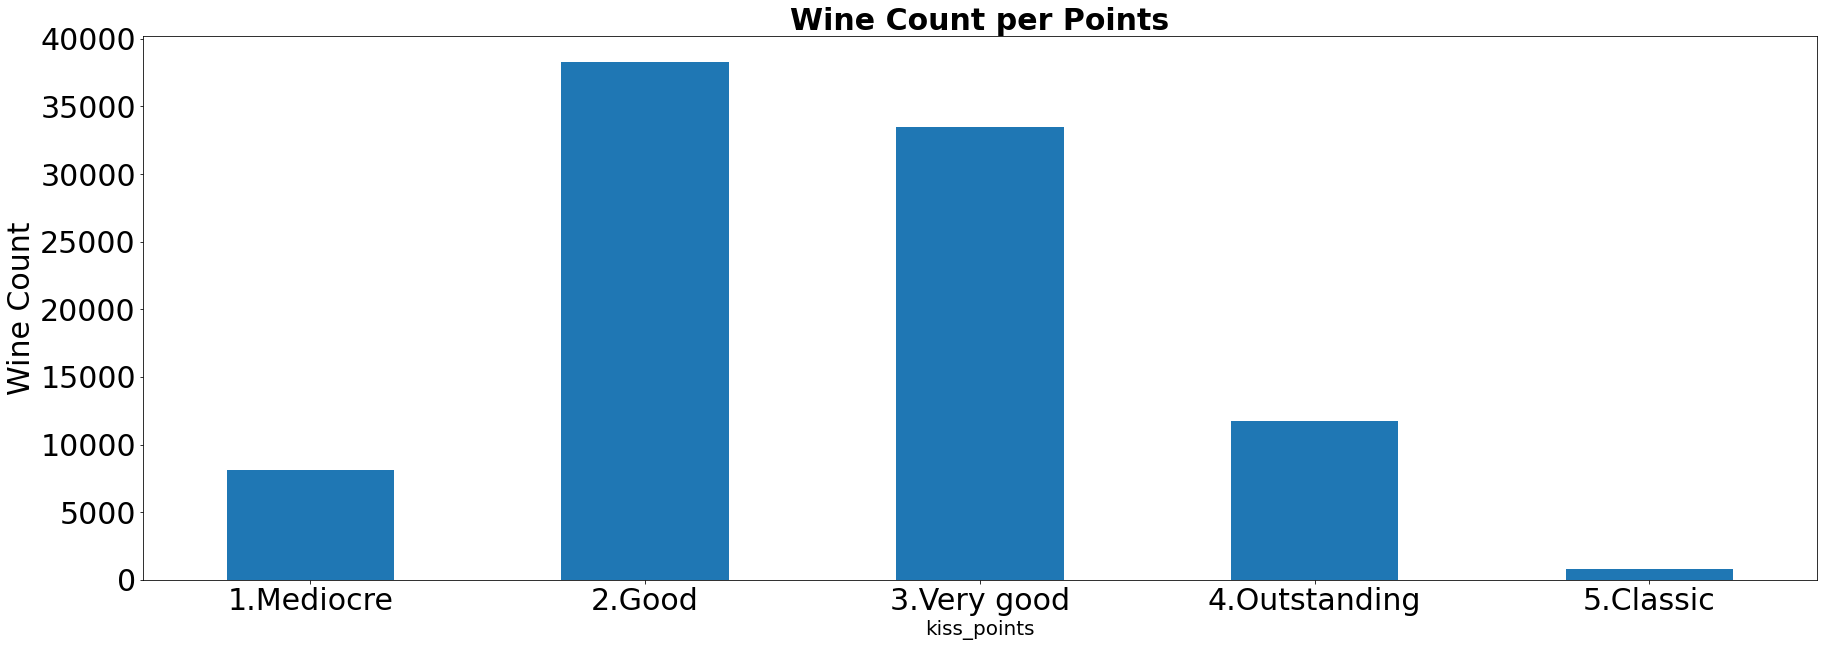

In [10]:
# plot the wine count per points
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30) 
ax.set_title('Wine Count per Points', fontweight="bold", size=30)
ax.set_ylabel('Wine Count', fontsize = 30)
ax.set_xlabel('Points', fontsize = 20) 
description_points_df.groupby(['kiss_points']).count()['description'].plot(ax=ax, kind = 'bar')#kind=bar for a bar chart
plt.xticks(rotation=0)
plt.show()

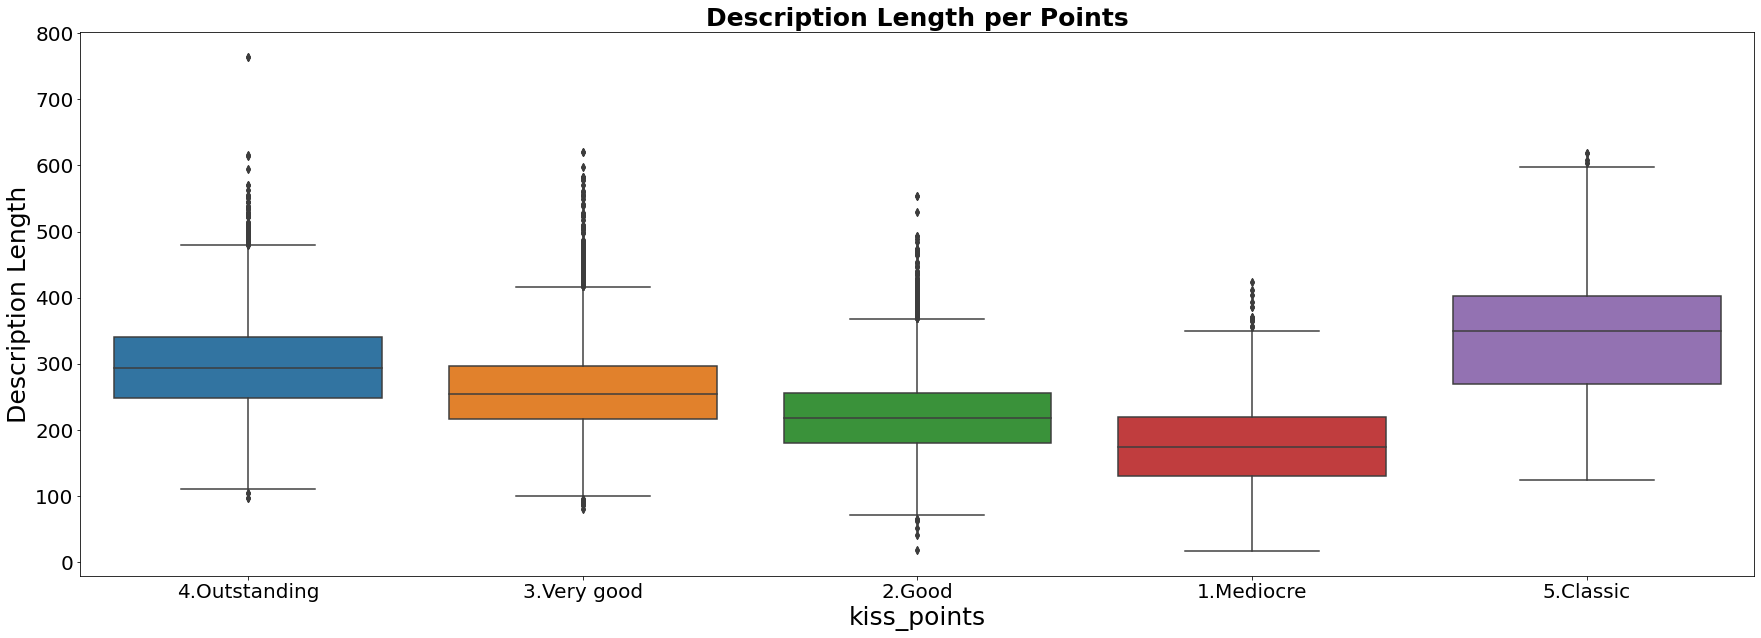

In [18]:
# plot correlation of description length to points
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='kiss_points', y='description_length', data=description_points_df)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Description Length per Points', fontweight="bold", size=25) 
ax.set_xlabel('kiss_points', fontsize = 25) 
ax.set_ylabel('Description Length', fontsize = 25) 
plt.show()

# Vectorization / bag-of-words
* CountVectorizer just counts the word frequencies.

In [12]:
X = description_points_df['description']
y = description_points_df['kiss_points']

vectorizer = CountVectorizer()
vectorizer.fit(X)
#print(vectorizer.vocabulary_)

CountVectorizer()

In [13]:
X = vectorizer.transform(X)
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (92393, 21400)
Amount of Non-Zero occurrences:  3172240
Density: 0.1604402000353832


# train_test_split

In [14]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

   1.Mediocre       1.00      0.95      0.97       763
       2.Good       0.96      0.99      0.98      3830
  3.Very good       0.98      0.97      0.97      3418
4.Outstanding       1.00      0.95      0.98      1135
    5.Classic       1.00      0.96      0.98        94

     accuracy                           0.98      9240
    macro avg       0.99      0.96      0.98      9240
 weighted avg       0.98      0.98      0.98      9240



# TF-IDF Vectorizer
* the weight increases proportionally to count, but is offset by the frequency of the word in the total corpus.

In [15]:
X = description_points_df['description']
y = description_points_df['kiss_points']

# Vectorizing model
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [16]:
# Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

   1.Mediocre       1.00      0.94      0.97       763
       2.Good       0.97      0.99      0.98      3830
  3.Very good       0.97      0.98      0.98      3418
4.Outstanding       1.00      0.95      0.97      1135
    5.Classic       1.00      0.96      0.98        94

     accuracy                           0.98      9240
    macro avg       0.99      0.96      0.98      9240
 weighted avg       0.98      0.98      0.98      9240



#  ლ(ಠ益ಠლ)
* Both CountVectorizer and TF-IDF Vectorizer come out at 98% in RFC
* I think I did something wrong
* I could add in some other columns?
* I could clean the dataset using stopwords?
